In [1]:
%run Latex_macros.ipynb

<IPython.core.display.Latex object>

Macro `_latex_std_` created. To execute, type its name (without quotes).
=== Macro contents: ===
get_ipython().run_line_magic('run', 'Latex_macros.ipynb')
 

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
MOVIE_DIR="./images"

CREATE_MOVIE = False # True if you have ffmpeg installed

import training_models_helper
%aimport training_models_helper

tmh = training_models_helper.TrainingModelsHelper()

gdh = training_models_helper.GradientDescentHelper()

import mnist_helper
%aimport mnist_helper

mnh = mnist_helper.MNIST_Helper()

import class_helper
%aimport class_helper

clh= class_helper.Classification_Helper()

# Gradient Descent

As we have seen before, Machine Learning is an optimization problem:
- minimize Cost/Loss
- maximize Utility

Most of the models we have seen thus far have relatively simple Cost functions that are amenable to
closed form solutions.

But the art of Machine Learning is in crafting Cost functions that express the goals of the problem.

So we can no longer count on closed form solutions for the optimization.

Gradient Descent is a way of finding the parameters (e.g, $\Theta$) that minimize
a given cost Function, ie., solving optimization problems.

The advantage of Gradient Descent is its ability to handle complex Cost Functions.

Gradient Descent
- minimizes convex functions
- is a type of search algorithm
- is a critical tool for Deep Learning
    - most cost functions won't be amenable to closed form solutions



## Cost/Loss, Utility/Optimization: review

- The prediction $\hat{\y}^{(i)}$ for example $\x^\ip$ is perfect if it matches the true label $\y^\ip$

$$ \hat{\y}^\ip = \y^\ip$$

- The distance between $\hat{\y}^{(i)}, \y^\ip$  is called the *Loss* (or *Cost*) for example $i$:

$$
\loss^\ip_\Theta =  L( \hat{\y}^\ip , \y) 
$$

where $L(a,b)$ is a function that is $0$ when $a = b$ and increasing as $a$ increasingly differs from $b$.

Two versions $L$ that we've seen are Mean Squared Error (for Regression) and Cross Entropy Loss (for classification).




The Loss for the entire training set is simply the average (across examples) of the Loss for the example

$$
\loss_\Theta  = { 1\over{m} } \sum_{i=1}^m \loss^\ip_\Theta
$$

Whereas Loss describes how "bad" our prediction is, we sometimes refer to the converse -- how "good" the prediction is.

We call the "goodness" of the prediction  the *Utility* $U_\Theta$.

So we could state the optimization objective either as
"minimize Cost" or "maximize Utility".

By convention, the DL optimization problem is usually framed as one of minimization (of cost or loss) 
rather than maximization of utility.


- The goal of fitting/training is to solve for the $\Theta$ that minimizes the training set loss 
$L_\Theta$ (or conversely, maximizes the Utility $U_\Theta$.

- The method for finding $\Theta$ is called optimization.

- There is one optimization method that we will study in depth: Gradient Descent.

- We can use this in Classical ML but it will become a key tool once we move on to Deep Learning.

- One focus of this lecture will be variations on Gradient Descent.

## Gradients

Gradient Descent is a method for optimizing the Optimization Objective.

It works for any model but we will illustrate it with Linear Regression.

For Regression with MSE as the loss, $L(a,b) = (a-b)^2$,so the loss for example $i$ is:
$$
\loss^\ip_\Theta = (\text{error}^\ip)^2
$$

where

$$
\text{error}^\ip = \hat{\y}^\ip - \y^\ip
$$

The average cost

$$
\begin{array}{lll}
\loss_\Theta = \text{MSE}(\X, \Theta) = {1 \over m} \sum_{i=1}^m { (\text{error}^{(i)} )^2}
\end{array}
$$

where $\X$ is the entire training set.

There may be added elements (e.g., regularization constraints) of the objective as well (discussed later). 

A function of $\Theta$, $\loss_\Theta$, can be minimized by taking its derivative 
with respect to $\Theta$ and setting it equal to $0$.

This is an equation that can be solved for $\Theta$.

Because $\Theta$ is a vector, there is one derivative per feature.
Hence the vector of derivatives (called the **gradient**) is

$
\nabla_\Theta \loss_\Theta =
\begin{pmatrix}
 \frac{\partial}{\partial \Theta_0} \loss_\Theta \\
 \frac{\partial}{\partial \Theta_1} \loss_\Theta\\
 \vdots \\
 \frac{\partial}{\partial \Theta_n} \loss_\Theta
\end{pmatrix}
$

For $\loss_\Theta = \text{MSE}(\X, \Theta)$
$$
\nabla_\Theta \loss_\Theta =
\begin{pmatrix}
 \frac{\partial}{\partial \Theta_0} \text{MSE}(X, \boldsymbol{\theta}) \\
 \frac{\partial}{\partial \Theta_1} \text{MSE}(X, \boldsymbol{\theta}) \\
 \vdots \\
 \frac{\partial}{\partial \Theta_n} \text{MSE}(X, \boldsymbol{\theta})
\end{pmatrix}
$$

$
\begin{array}{lll}
{ { \partial  }\over { \partial{ \theta_j} } } { \text{MSE}(X, \Theta) }& = & {1 \over m} \sum_{i=1}^m { \partial \over { \partial \theta_j } } { ( \text{error}^{(i)})^2 }\\
& = & {1 \over m} \sum_{i=1}^m { 2 \times \text{error}^{(i)} \times { \partial \over { \theta_j} }} {\text{error}^{(i)} }\\
& = & {2 \over m} \sum_{i=1}^m { \text{error}^{(i)} \times { \partial \over { \theta_j} }} { \hat{\y^\ip } } &\text{ since } \text{error}^\ip = \hat{\y}^\ip - \y^\ip, \y^\ip \text{ is constant}\\
&= &  {2 \over m} \sum_{i=1}^m { \text{error}^{(i)} \times { \x^\ip_j} } & \text{ since } \hat{y}^\ip = \Theta^T \cdot \x = \sum_{k=1}^n { \Theta_k \x^\ip_k}  \\ & & &\text{ and } \Theta_j \x^\ip_j \text{ is only term involving } \Theta_j \\
\end{array}
$

Thus the gradient for Linear Regression can be written in matrix form as

$
\nabla_{\boldsymbol{\theta}}\, \text{MSE}(X, \boldsymbol{\theta}) =
 = \dfrac{2}{m} \X^T ( \theta^T \X - \mathbf{y})
$

This will be particularly useful when working with NumPy as the gradient calculation is a vector operation that is implemented so as to be fast.

## Batch Gradient Descent

The basic algorithm is:
1. Initialize $\Theta$ randomly
1. Repeat until done
    1. Compute the Gradient
    1. Update $\Theta$ by taking a step in the (negative) direction of the Gradient

**Intuition**

- Our objective is to minimize the Average Loss $\loss_\Theta$
- The gradient, with respect to $\Theta_j$, is the increase in $\loss_\Theta$ for a unit change in $\Theta_j$
    - we multiply by -1 to *decrease* the loss
- So by taking a step (size to be determined) in the negative direction of the gradient we decrease $\loss_\Theta$

Let's illustrate Batch Gradient Descent on an example.

First, we use sklearn's `LinearRegression` as a baseline against which we will compare the $\Theta$ obtained from
Gradient Descent.

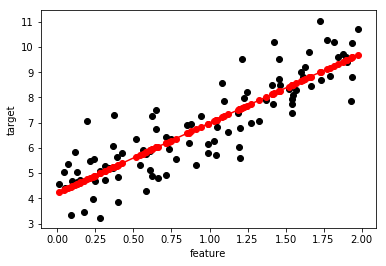

In [3]:
X_lr, y_lr = gdh.gen_lr_data()
clf_lr = gdh.fit_lr(X_lr,y_lr)
fig, ax = gdh.plot_lr(X_lr, y_lr, clf_lr)

theta_lr = (clf_lr.intercept_, clf_lr.coef_)

Now let's perform Batch Gradient Descent and compare the $\Theta$'s

In [4]:
gd_theta = gdh.batchGradientDescent_lr(X_lr, y_lr)
theta_lr - gd_theta

array([[ 7.99360578e-15],
       [-7.99360578e-15]])

The $\Theta$'s are equal up to 15 decimal points.

Let's look at the code for Batch Gradient Descent and examine the details

- You can see the code that implements the steps described in English
    - `alpha` is the step size: how fast we adjust $\Theta$ in the direction of the gradient
    - `X_b` is the matrix
        - whose first column is $1$
        - whose other columns are the non-intercept features
    - `X_b.dot(theta)` are the predicted values for all observations
    - `X_b.dot(theta) - y` are the errors for all observations

**Intuition**

- Why is the proportional to `gradients`?
    - When the gradient is large, we are far from the minimum $\loss_\Theta$: take a big step
    - When the gradient is small, we are close to the minimum $\loss_\Theta$: take a small step
- Why $\alpha < 1$ ?
    - If we take too big a step, we may overshoot the minimum, as we will see

Since the $\Theta$'s computed by Gradient Descent and Linear Regression are the same, it's no surprise that the predictions are too.
- as demonstrated in the following code

In [5]:
X_new = np.array([[0], [2]])
gd_y_pred = gdh.predict(X_new, theta_lr)
clf_y_pred = clf_lr.predict(X_new)

gd_y_pred == clf_y_pred

array([[ True],
       [ True]])

### Batch gradient descent: the movie

We can hopefully gain intuition by watching Gradient Descent at work.
- you will see the effect of each update of $\Theta$
- you will see the effect of changing $\eta$, which scales the step size


In [6]:
%%capture
movie_file = os.path.join(MOVIE_DIR,'batch_gradient_descent_eta_10.mp4')

if CREATE_MOVIE:
    gd_anim = gdh.create_movie(X_lr, y_lr, n_iterations=10)
    gd_anim.save(movie_file, codec='h264')


if CREATE_MOVIE:
    gdh.show_movie(gd_anim)
else:
    print("To view movie:\n Use link in following cell, or use browser to visit file {f}".format(f=movie_file))

[Movie](images/batch_gradient_descent_eta_10.mp4)

### Initializing $\Theta$
What would have happened if, instead of initializing $\Theta$ to random numbers 
- we had initialized it to $0$ ?
- we had initialized it to a very large number

### Step size

What's a good choice for `alpha` ?  We had used 0.1 and obtained convergence in around 10 steps.

Le'ts try a smaller step size: `alpha` = 0.2

In [7]:
%%capture
movie_file = os.path.join(MOVIE_DIR,'batch_gradient_descent_eta_02.mp4')

if CREATE_MOVIE:
    gd_anim_eta_02 = gdh.create_movie(X_lr, y_lr, alpha=0.02, n_iterations=30)
    gd_anim_eta_02.save(movie_file, codec='h264')


if CREATE_MOVIE:
    gdh.show_movie(gd_anim_eta_02)
else:
    print("To view movie:\n Use link in following cell, or use browser to visit file {f}".format(f=movie_file))

[Movie](images/batch_gradient_descent_eta_02.mp4)

Like watching paint dry !

How about something bigger ?

In [8]:
%%capture
movie_file = os.path.join(MOVIE_DIR,'batch_gradient_descent_eta_45.mp4')
if CREATE_MOVIE:
    gd_anim_eta_45 = gdh.create_movie(X_lr, y_lr, alpha=0.45, n_iterations=20)
    gd_anim_eta_45.save(movie_file, codec='h264')


if CREATE_MOVIE:
    gdh.show_movie(gd_anim_eta_45)
else:
    print("To view movie:\n Use link in following cell, or use browser to visit file {f}".format(f=movie_file))

[Movie](images/batch_gradient_descent_eta_45.mp4)

And even bigger

In [9]:
%%capture
movie_file = os.path.join(MOVIE_DIR,'batch_gradient_descent_eta_50.mp4')

if CREATE_MOVIE:
    gd_anim_eta_50 = gdh.create_movie(X_lr, y_lr, alpha=0.50, n_iterations=20)
    gd_anim_eta_50.save(movie_file, codec='h264')


if CREATE_MOVIE:
    gdh.show_movie(gd_anim_eta_50)
else:
    print("To view movie:\n Use link in following cell, or use browser to visit file {f}".format(f=movie_file))

[Movie](images/batch_gradient_descent_eta_50.mp4)

Lost in space !
- the vertical intercept magnitude increases until it is off the screen

### Learning rate schedule

We see from the above that if the step size is too small, it takes long to converge.

But if the step size is too big, we may overshoot.

An adaptive learning rate schedule may be the solution:
- take big steps at first
- take smaller steps toward end

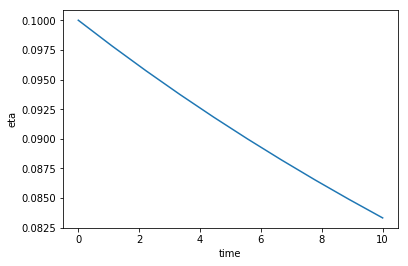

In [10]:
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

t = np.linspace(0, 10, 10)

fig = plt.figure()
ax  = fig.add_subplot(1,1,1)
_ =ax.plot(t, learning_schedule(t))
_ = ax.set_xlabel("time")
_ = ax.set_ylabel("eta")

### When to stop

Can we do better than running for a fixed number of iterations ?
Yes:
- Let $\text{Cost}_{t}$ be the Cpst Function at step $t$
- Stop if
    - $\text{Cost}_{t-1} - \text{Cost}_{t} < \epsilon $
    - That is: stop if improvement of Cost Function is not big enough

## A word on derivatives

Preview of part 2 of the course:
- the derivatives we used were *analytic* and not numerical approximations
- how can we automate calculation of analytic derivatives ?

## Other cost functions

- Ridge Regression Cost Function
    - MSE, with a penalty large $\Theta$
        - it's easy to compute the derivative of this cost function
        - try Minibatch Gradient Descent on this Cost Functions

### Gradient Boosing

In the Decision Tree lecture we described Gradient Boosting (using Decision Tree Regression as an example).

Herei
- We built a *sequence* of Trees $T_{(0)}, T_{(1)}, \ldots$
- The relevance to us is that this resulted in a sequence of predictions $\hat{\y}_{(0)}, \y_{(1)}, \ldots$
- We updated $\hat{\y}$ via
 $$\hat{\y}_\tp = \hat{\y}_{(t-1)} + \alpha *\hat{\e}_\tp$$
     - where $\e_\tp = \y - \hat{\y}_{(t-1)}$
   

For an MSE loss function
$$
\loss^\ip = ( \hat{\y}_{(t-1)} - \y )^2
$$

the derivative with respect to $\hat{\y}_{(t-1)}$ is
$$
\begin{array}[lll]\\
\frac{\partial \loss^\ip }{\partial \hat{\y}_{(t-1)}}  & = &  2 * (  \hat{\y}_{(t-1)} - \y) & \text{ by chain rule}\\
& = & -2 * \e_\tp \\
\end{array}
$$

So the update rule for Gradient Boosting is the same as for Gradient Descent !

Thus Gradient Boosting, which was originally described informally 
- is the minimization an MSE loss function by Gradient Descent.
 - n.b., we often describe a loss function as 0.5 time that described above
     - in to cancel out the $2$ from the derivative of the sqaured error

# Improvements to Gradient Descent

[Simon Ruder survey](https://arxiv.org/abs/1609.04747)

[Gradient Descent Cheatsheet](https://towardsdatascience.com/10-gradient-descent-optimisation-algorithms-86989510b5e9)

The update step
$$
\Theta = \Theta - \alpha * \frac{\partial \loss_\Theta }{\partial \Theta}
$$


where $\alpha$ is the learning rate.

The improvements to Gradient Descent modify
- $\alpha$, the learning rate
- $\frac{\partial \loss_\Theta }{\partial \Theta}$ the gradient

In order to be able to flexibly change the definiton of both the gradient and the learning rate
at each time step $t$,
e will re-write the update step at time $t$ as

$$
\Theta_\tp = \Theta_{(t-1)} -  \alpha' * V_\tp
$$

$V_\tp$ will be our modified gradient and $\alpha'$ our modified learning rate.

## Momentum: modify the gradient

In vanilla Gradient Descent, the gradients at time $t-1$ and time $t$ are completely independent.

This has the potential for gradients to rapidly change direction (recall, they are a vector).

To smooth out jumps we could compute a modified gradient $V_\tp$ as:
$$
V_\tp = \beta_V * V_{(t-1)} + (1 - \beta_V) * \frac{\partial \loss_\Theta }{\partial \Theta}
$$

(Initialize $V_0 = 0$)

That is, the modified gradient is a weighted combination of the previous gradient and the new gradient.

Typically $\beta_V \approx 0.9$ so the old gradient dominates.

$V_\tp$ is the exponentially weighted moving average of the gradient.

Hence, there is "momentum" in the gradients in that they can't jump suddenly.

## RMSprop: Modify the learning rate

Let
$$
S_\tp = \beta_S * S_{(t-1)} + (1 -\beta_S) * \left( \frac{\partial \loss_\Theta }{\partial \Theta} \right)^2
$$

That is, $S_\tp$ is the exponentially weighted *variance* of the gradient.

(Initialize $S_0 = 0$)

Rather than using a learning rate of $\alpha$, the RMSprop algorithm uses
$$
\alpha' = \frac{1}{\sqrt{S_\tp + \epsilon}} * \alpha
$$

The intuition is that if the gradient with respect to $\Theta_j$ is noisy (i.e., large variance)
we want to damp updates in that component.

This also has the advantage that a rarely updated element $\Theta_i$, having a low variance,
will have a relatively larger update when it is encountered than a more frequently encountered feature.

Typically $\beta_S \approx 0.9$ so the old variance dominates.

Why the extra $\epsilon$ ?  We've seen this before (e.g., $\log(x + \epsilon)$):
it's to avoid mathematical issues of certain functions (inverse, log) when the argument is $0$.

## AdaM: Modify both the gradient and the learning rate

The AdaAM (Adaptive Moment) algorithm modifies both the gradient and learning rates via
exponentially moving averages of the gradient as well as its variance.

$$
\begin{array}[lll] \\
V_\tp = \beta_V * V_{(t-1)} + (1 - \beta_V) \frac{\partial \loss_\Theta }{\partial \Theta} \\
S_\tp = \beta_S * S_{(t-1)} + (1 -\beta_S) * \left( \frac{\partial \loss }{\partial \Theta} \right)^2 \\
\alpha' = \frac{1}{\sqrt{S_\tp + \epsilon}} * \alpha
\end{array}
$$

### Bias correction

You will have observed that we initialized to $0$ the moving averages for gradients ($V_0 = 0$) and
the variance of the gradients ($S_0 = 0$).

So the values are "biased" towards 0 with the bias having greatest effect for small $t$ (i.e., when the number
of "actual" values is small).

We can correct for the bias by dividing by $(1 - \beta^t)$:

$$
\begin{array}[lll] \\
\hat{V} & = & \frac{V_\tp}{1 - \beta_V^t} \\
\hat{S} & = & \frac{S_\tp}{1 - \beta_S^t} \\
\end{array}
$$

In [11]:
print("Done")

Done
